In [ ]:
import perceval as pcvl
from perceval import Circuit
from perceval.components import BS, PERM, Port
from perceval.utils import Encoding, PostSelect
import math
import numpy as np
import perceval.components as comp
from perceval.rendering.circuit import SymbSkin, PhysSkin

In [ ]:
# 30 phase shift params in generator
phi = math.pi / 2
gen_params = []
for i in range(30):
    pname = "phi" + str(i)
    param = pcvl.P(pname)
    param.set_value(phi)
    gen_params.append(param)
theta = math.pi/2
generator = pcvl.Circuit(8)

# 12 phase shift params in discriminator
discrim_params = []
for i in range(12):
    pname = "phi" + str(i)
    param = pcvl.P(pname)
    param.set_value(phi)
    discrim_params.append(param)

In [ ]:
# Build Generator Model
theta = math.pi/2
generator = pcvl.Circuit(8)

generator.add(1, comp.PS(gen_params[0]))
generator.add(2, comp.PS(gen_params[1]))
generator.add(3, comp.PS(gen_params[2]))
generator.add(1, comp.BS(theta))
generator.add(1, comp.PS(gen_params[3]))
generator.add(1, comp.BS(theta))
generator.add(0, comp.BS(theta))
generator.add(2, comp.BS(theta))
generator.add(0, comp.PS(gen_params[4]))
generator.add(0, comp.BS(theta))
generator.add(2, comp.PS(gen_params[5]))
generator.add(2, comp.BS(theta))
generator.add(1, comp.PS(gen_params[6]))
generator.add(1, comp.BS(theta))
generator.add(1, comp.PS(gen_params[7]))
generator.add(1, comp.BS(theta))
generator.add(0, comp.PS(gen_params[8]))
generator.add(2, comp.PS(gen_params[9]))
generator.add(0, comp.BS(theta))
generator.add(2, comp.BS(theta))
generator.add(0, comp.PS(gen_params[10]))
generator.add(0, comp.BS(theta))
generator.add(2, comp.PS(gen_params[11]))
generator.add(2, comp.BS(theta))
generator.add(0, comp.PS(gen_params[12]))
generator.add(1, comp.PS(gen_params[13]))
generator.add(2, comp.PS(gen_params[14]))


generator.add(5, comp.PS(gen_params[15]))
generator.add(6, comp.PS(gen_params[16]))
generator.add(7, comp.PS(gen_params[17]))   
generator.add(5, comp.BS(theta))
generator.add(5, comp.PS(gen_params[18]))
generator.add(5, comp.BS(theta))
generator.add(4, comp.BS(theta))
generator.add(6, comp.BS(theta))
generator.add(4, comp.PS(gen_params[19]))
generator.add(4, comp.BS(theta))
generator.add(6, comp.PS(gen_params[20]))
generator.add(6, comp.BS(theta))
generator.add(5, comp.PS(gen_params[21]))
generator.add(5, comp.BS(theta))
generator.add(5, comp.PS(gen_params[22]))
generator.add(5, comp.BS(theta))
generator.add(4, comp.PS(gen_params[23]))
generator.add(6, comp.PS(gen_params[24]))
generator.add(4, comp.BS(theta))
generator.add(6, comp.BS(theta))
generator.add(4, comp.PS(gen_params[25]))
generator.add(4, comp.BS(theta))
generator.add(6, comp.PS(gen_params[26]))
generator.add(6, comp.BS(theta))
generator.add(4, comp.PS(gen_params[27]))
generator.add(5, comp.PS(gen_params[28]))
generator.add(6, comp.PS(gen_params[29]))

In [ ]:
# Build Discriminator Model
theta = math.pi/2
discriminator = pcvl.Circuit(8)

discriminator.add(0, comp.PS(discrim_params[0]))
discriminator.add(1, comp.PS(discrim_params[1]))
discriminator.add(2, comp.PS(discrim_params[2]))

discriminator.add((0, 1), comp.BS(theta))
discriminator.add((2, 3), comp.BS(theta))

discriminator.add(0, comp.PS(discrim_params[3]))
discriminator.add(2, comp.PS(discrim_params[4]))

discriminator.add((0, 1), comp.BS(theta))
discriminator.add((2, 3), comp.BS(theta))

discriminator.add((1, 2), comp.BS(theta))

discriminator.add(1, comp.PS(discrim_params[5]))

discriminator.add((1, 2), comp.BS(theta))

discriminator.add(4, comp.PS(discrim_params[6]))
discriminator.add(5, comp.PS(discrim_params[7]))
discriminator.add(6, comp.PS(discrim_params[8]))

discriminator.add((4, 5), comp.BS(theta))
discriminator.add((6, 7), comp.BS(theta))

discriminator.add(4, comp.PS(discrim_params[9]))
discriminator.add(6, comp.PS(discrim_params[10]))

discriminator.add((4, 5), comp.BS(theta))
discriminator.add((6, 7), comp.BS(theta))

discriminator.add((5, 6), comp.BS(theta))

discriminator.add(5, comp.PS(discrim_params[11]))

discriminator.add((5, 6), comp.BS(theta))

In [ ]:
def generate(phase_shift_angles, input_vec):
    for i in range(30):
        gen_params[i].set_value(phase_shift_angles[i])
    g_processor = pcvl.Processor("SLOS", generator)
    g_processor.with_input(input_vec)
    g_sampler = pcvl.algorithm.Sampler(g_processor)

    return g_sampler

In [ ]:
def discriminate(phase_discriminate_angles, input_vec):
    for i in range(12):
        discrim_params[i].set_value(phase_discriminate_angles[i])
    d_processor = pcvl.Processor("SLOS", discriminator)
    d_processor.with_input(input_vec)
    d_sampler = pcvl.algorithm.Sampler(d_processor) 

    return d_sampler

In [ ]:
# Initalize phase shift angles

phase_shift_angles = [phi]*30
phase_discriminate_angles = [phi]*12

# test

st1 = pcvl.StateVector("|1,0,0,0,1,0,0,0>")
st2 = pcvl.StateVector("|0,1,0,0,0,1,0,0>")
st3 = pcvl.StateVector("|0,0,1,0,0,0,1,0>")
st4 = pcvl.StateVector("|0,0,0,1,0,0,0,1>")
stf = st1 + st2 + st3 + st4

t1 = pcvl.StateVector("|1,0,0,0,0,1,0,0>")
t2 = pcvl.StateVector("|0,1,0,0,0,0,1,0>")
t3 = pcvl.StateVector("|0,0,1,0,0,0,0,1>")
t4 = pcvl.StateVector("|0,0,0,1,1,0,0,0>")
tau = t1 + t2 + t3 + t4

print(generate(phase_shift_angles, stf).samples(1)['results'][0])
print(discriminate(phase_discriminate_angles, generate(phase_shift_angles, stf).samples(1)['results'][0]).samples(1)['results'][0])

In [ ]:
#all imports

import perceval as pcvl
import math
import numpy as np

# calculate the loss function
def calculate_loss(generator_angles, discriminator_angles): #for minimizing from an ungenerated vector
  for i in range(30):
    gen_params[i].set_value(generator_angles[i])
  for i in range(12):
    discrim_params[i].set_value(discriminator_angles[i])
  g_sampler = generate(generator_angles, stf)
  g_sample = g_sampler.samples(1)['results'][0]
  d_sampler = discriminate(discriminator_angles, g_sample)
  dist1 = d_sampler.probs()['results'][pcvl.BasicState("|0, 1, 0, 0, 0, 1, 0, 0>")]

  tau_d_sampler = discriminate(discriminator_angles, tau)
  dist2 = tau_d_sampler.probs()['results'][pcvl.BasicState("|0, 1, 0, 0, 0, 1, 0, 0>")]

  return abs(dist1 - dist2), dist1, dist2



phase_actual_angles = np.array([0.87700001, 1.29945375, 1.22958453, 0.80825399, 1.32367853, 1.24938575,
 1.52368353, 1.39377473, 1.00303004, 0.64323807, 1.35395096, 1.43155562])



In [ ]:
# Tracks our loss function as we train
loss_tracker = [0]
th_state = ["|1, 0, 0, 0, 0, 1, 0, 0>", "|0, 1, 0, 0, 0, 0, 1, 0>", "|0, 0, 1, 0, 0, 0, 0, 1>", "|0, 0, 0, 1, 1, 0, 0, 0>"]
fidelity_scores = [0]
gen_scores = [0]
tau_scores = [0]

def training_generator(phase_shift_angles, epochs, d_theta):
  generate_gradient = np.array([0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0])
  for epoch in range(0, epochs):
    for index in range(len(phase_shift_angles)):
      theta_plus = phase_shift_angles.copy()
      theta_plus[index] = phase_shift_angles[index] + d_theta
      theta_minus = phase_shift_angles.copy()
      theta_minus[index] = phase_shift_angles[index] - d_theta
      slope = (calculate_loss(theta_plus, phase_discriminate_angles)[0] - calculate_loss(theta_minus, phase_discriminate_angles)[0]) / (2*d_theta)
      slope = round(slope, 4)
      generate_gradient[index] = slope
      # print(slope)
      # print(generate_gradient)
    phase_shift_angles = phase_shift_angles - generate_gradient * d_theta
    loss, gen, tau_score = calculate_loss(phase_shift_angles, phase_discriminate_angles)
    print("gtrain loss:" + str(loss))
    loss_tracker.append(loss)
    gen_scores.append(gen)
    tau_scores.append(tau_score)
    g_sampler = generate(phase_shift_angles, stf)
    fidelity = 0
    for state in th_state:
        fidelity += g_sampler.probs()['results'][pcvl.BasicState(state)]
    print("gtrain fid:" + str(fidelity))
    fidelity_scores.append(fidelity)
  return phase_shift_angles

def training_discriminator(phase_discriminate_angles, epochs, d_theta):
  for epoch in range(0, epochs):
    change = abs(np.random.normal(1, 0.5))*d_theta
    for index in range(len(phase_discriminate_angles)):
      theta_plus = phase_discriminate_angles.copy()
      theta_plus[index] = phase_discriminate_angles[index] + change
      theta_minus = phase_discriminate_angles.copy()
      theta_minus[index] = phase_discriminate_angles[index] - change
      slope = (calculate_loss(phase_shift_angles, theta_plus)[0] - calculate_loss(phase_shift_angles, theta_minus)[0]) / (2*change)
      slope = round(slope, 4)
      phase_discriminate_angles[index] = phase_discriminate_angles[index] + slope * change
    loss, gen, tau_score = calculate_loss(phase_shift_angles, phase_discriminate_angles)
    print("dtrain loss:" + str(loss))
    loss_tracker.append(loss)
    gen_scores.append(gen)
    tau_scores.append(tau_score)
    g_sampler = generate(phase_shift_angles, stf)
    fidelity = 0
    for state in th_state:
        fidelity += g_sampler.probs()['results'][pcvl.BasicState(state)]
    print("dtrain fid:" + str(fidelity))
    fidelity_scores.append(fidelity)
  return phase_discriminate_angles

In [ ]:
# Train the parameters
x = 0
while x < 100:
  print("Epoch: " + str(x))
  phase_discriminate_angles = training_discriminator(phase_discriminate_angles, 5, 0.01)
  phase_shift_angles = training_generator(phase_shift_angles, 15, 0.01)

  x = x+1

In [44]:
# Calculate the fidelity by projecting onto tau
th_state = ["|1, 0, 0, 0, 0, 1, 0, 0>", "|0, 1, 0, 0, 0, 0, 1, 0>", "|0, 0, 1, 0, 0, 0, 0, 1>", "|0, 0, 0, 1, 1, 0, 0, 0>"]
g_sampler = generate(phase_shift_angles, stf)
fidelity = 0
for state in th_state:
    fidelity += g_sampler.probs()['results'][pcvl.BasicState(state)]
print(fidelity)

0.346615377259413


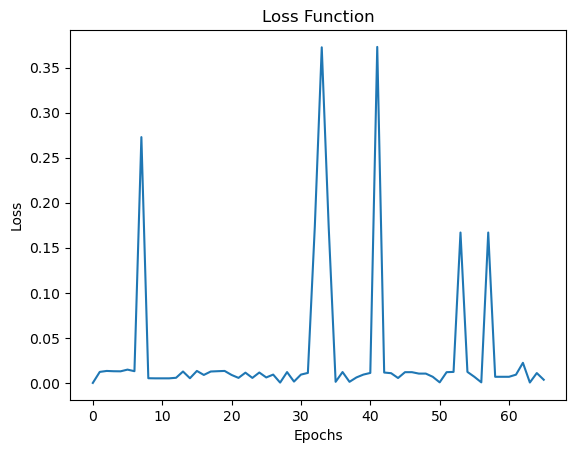

In [45]:
import matplotlib.pyplot as plt
plt.plot(loss_tracker)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Function')
plt.show()

Text(0.5, 1.0, 'Generator and Discriminator Scores')

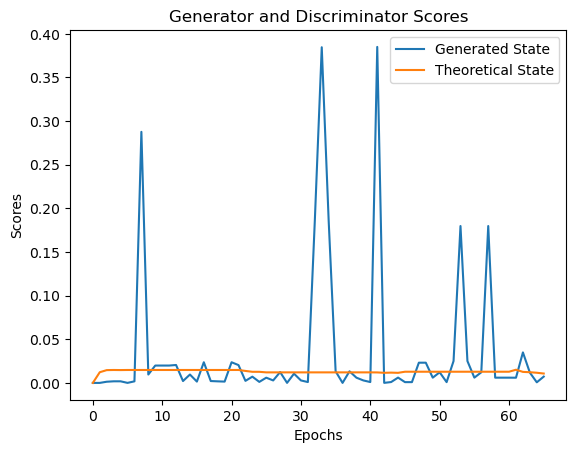

In [46]:
# Plot the generator and discriminator scores
plt.plot(gen_scores)
plt.plot(tau_scores)
plt.xlabel('Epochs')
plt.legend(['Generated State', 'Theoretical State'], loc='upper right')
plt.ylabel('Scores')
plt.title('Generator and Discriminator Scores')


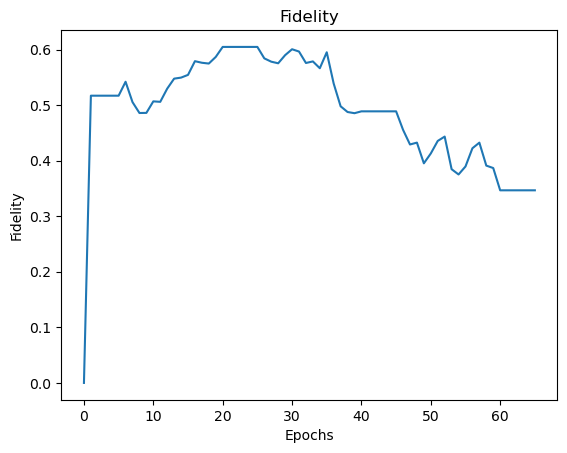

In [47]:
# Plot the fidelity
plt.plot(fidelity_scores)
plt.xlabel('Epochs')
plt.ylabel('Fidelity')
plt.title('Fidelity')
plt.show()

In [ ]:
# Saving some generator weights that have very high fidelity measure
really_good_weights = [1.47792293, 1.49078223, 1.44426633, 1.10679943, 1.93115503,
       1.53476983, 1.22454473, 2.11418663, 2.24614793, 2.11267583,
       1.52300323, 1.69297423, 1.56107503, 1.50252823, 1.56577133,
       1.48060163, 1.45246733, 1.39190153, 2.00855323, 1.30646613,
       1.19894733, 2.26236873, 0.64821883, 0.97429743, 1.25474383,
       0.93633533, 2.26012883, 1.48809073, 1.55374773, 1.69510973]

In [ ]:
# This is sort of a cheat way to generate high fidelity measures
# Train with fidelity instead of our loss function.
# Confirms that our gradient descent is working
fidelity_tracker = []

def calculate_fidelity(generator_angles):
    g_sampler = generate(generator_angles, stf)
    fidelity = 0
    for state in th_state:
        fidelity += g_sampler.probs()['results'][pcvl.BasicState(state)]
    return fidelity 

def fidelity_generator(phase_shift_angles, epochs, d_theta):
  generate_gradient = np.array([0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0])
  for epoch in range(0, epochs):
    for index in range(len(phase_shift_angles)):
      theta_plus = phase_shift_angles.copy()
      theta_plus[index] = phase_shift_angles[index] + d_theta
      theta_minus = phase_shift_angles.copy()
      theta_minus[index] = phase_shift_angles[index] - d_theta
      slope = (calculate_fidelity(theta_plus) - calculate_fidelity(theta_minus)) / (2*d_theta)
      slope = round(slope, 4)
      generate_gradient[index] = slope
      # print(slope)
      # print(generate_gradient)
    phase_shift_angles = phase_shift_angles + generate_gradient * d_theta
    fidelity_tracker.append(calculate_fidelity(phase_shift_angles))
  # print("Generator:")
  # print(phase_shift_angles)
  return phase_shift_angles

for i in range(100):
  print("Epoch: " + str(i))
  phase_shift_angles = fidelity_generator(phase_shift_angles, 5, 0.5)

In [ ]:
max_entangled_states = ["|1, 0, 0, 0, 1, 0, 0, 0>", "|0, 1, 0, 0, 0, 1, 0, 0>", "|0, 0, 1, 0, 0, 0, 1, 0>", "|0, 0, 0, 1, 0, 0, 0, 1>"]
# The desired state, |1,1>
# max_entangled_states = ["|0, 1, 0, 0, 0, 1, 0, 0>"]
def cheat_loss(phase_discriminate_angles):
    loss = 0
    d_sampler = discriminate(phase_discriminate_angles, tau)
    for state in max_entangled_states:
        loss += d_sampler.probs()['results'][pcvl.BasicState(state)]
    return loss

def cheat_discriminator(phase_discriminate_angles, epochs, d_theta):
  discriminate_gradient = np.array([0.0,0,0,0,0,0,0,0,0,0,0,0])
  for epoch in range(0, epochs):
    for index in range(len(phase_discriminate_angles)):
      theta_plus = phase_discriminate_angles.copy()
      theta_plus[index] = phase_discriminate_angles[index] + d_theta
      theta_minus = phase_discriminate_angles.copy()
      theta_minus[index] = phase_discriminate_angles[index] - d_theta
      slope = (cheat_loss(theta_plus) - cheat_loss(theta_minus)) / (2*d_theta)
      slope = round(slope, 4)
      discriminate_gradient[index] = slope
    phase_discriminate_angles = phase_discriminate_angles + discriminate_gradient * d_theta
    print(cheat_loss(phase_discriminate_angles))
  return phase_discriminate_angles

for i in range(100):
    print("Epoch: " + str(i))
    phase_discriminate_angles = cheat_discriminator(phase_discriminate_angles, 5, 0.05)

In [ ]:
d_sampler = discriminate(phase_discriminate_angles, tau)
d_sampler.probs()

In [ ]:
# GAN but with tomography?

max_entangled_states = ["|1, 0, 0, 0, 1, 0, 0, 0>", "|0, 1, 0, 0, 0, 1, 0, 0>", "|0, 0, 1, 0, 0, 0, 1, 0>", "|0, 0, 0, 1, 0, 0, 0, 1>"]
# custom loss function that fully measures the output of the discriminator
def calculate_loss(generator_angles, discriminator_angles): #for minimizing from an ungenerated vector
  for i in range(30):
    gen_params[i].set_value(generator_angles[i])
  for i in range(12):
    discrim_params[i].set_value(discriminator_angles[i])
  g_sampler = generate(generator_angles, stf)
  g_sample = g_sampler.samples(1)['results'][0]
  d_sampler = discriminate(discriminator_angles, g_sample)
  dist1 = 0
  for state in max_entangled_states:
        dist1 += d_sampler.probs()['results'][pcvl.BasicState(state)]

  tau_d_sampler = discriminate(discriminator_angles, tau)
  dist2 = 0
  for state in max_entangled_states:
        dist2 += tau_d_sampler.probs()['results'][pcvl.BasicState(state)]

  return abs(dist1 - dist2)

def training_generator(phase_shift_angles, epochs, d_theta):
  generate_gradient = np.array([0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0])
  for epoch in range(0, epochs):
    for index in range(len(phase_shift_angles)):
      theta_plus = phase_shift_angles.copy()
      theta_plus[index] = phase_shift_angles[index] + d_theta
      theta_minus = phase_shift_angles.copy()
      theta_minus[index] = phase_shift_angles[index] - d_theta
      slope = (calculate_loss(theta_plus, phase_discriminate_angles) - calculate_loss(theta_minus, phase_discriminate_angles)) / (2*d_theta)
      slope = round(slope, 4)
      generate_gradient[index] = slope
      # print(slope)
      # print(generate_gradient)
    phase_shift_angles = phase_shift_angles - generate_gradient * d_theta
    loss_tracker.append(calculate_loss(phase_shift_angles, phase_discriminate_angles))
  print("Generator:")
  print(phase_shift_angles)
  return phase_shift_angles

def training_discriminator(phase_discriminate_angles, epochs, d_theta):
  discriminate_gradient = np.array([0.0,0,0,0,0,0,0,0,0,0,0,0])
  for epoch in range(0, epochs):
    for index in range(len(phase_discriminate_angles)):
      theta_plus = phase_discriminate_angles.copy()
      theta_plus[index] = phase_discriminate_angles[index] + d_theta
      theta_minus = phase_discriminate_angles.copy()
      theta_minus[index] = phase_discriminate_angles[index] + d_theta
      slope = (calculate_loss(phase_shift_angles, theta_plus) - calculate_loss(phase_shift_angles, theta_minus)) / (2*d_theta)
      slope = round(slope, 4)
      discriminate_gradient[index] = slope
    phase_discriminate_angles = phase_discriminate_angles + discriminate_gradient * d_theta
    # print(discriminate_gradient)
    loss_tracker.append(calculate_loss(phase_shift_angles, phase_discriminate_angles))
  print("Discriminator:")
  print(phase_discriminate_angles)
  return phase_discriminate_angles
    
x = 0
while x < 20:
  print("Epoch: " + str(x))
  phase_discriminate_angles = training_discriminator(phase_discriminate_angles, 25, 0.1)
  phase_shift_angles = training_generator(phase_shift_angles, 25, 0.1)

  x = x+1

In [ ]:
x = 0
while x < 100:
  print("Epoch: " + str(x))
  phase_discriminate_angles = training_discriminator(phase_discriminate_angles, 5, 0.5)
  phase_shift_angles = training_generator(phase_shift_angles, 15, 0.1)

  x = x+1

In [ ]:
M = pcvl.pdisplay(discriminator.U)
rho = pcvl.pdisplay(generator.U)
tau_hat = 

In [ ]:
def matrix_loss(generator_angles, discriminator_angles):
    tau_hat = tau**2
    M_hat = 
    d_sampler = discriminate(discriminator_angles, tau)
    loss = 0
    for state in max_entangled_states:
        loss += d_sampler.probs()['results'][pcvl.BasicState(state)]
    return loss

In [ ]:
pcvl.pdisplay(discriminator.U)
pcvl.pdisplay(generator.U)

In [ ]:
dtop = pcvl.Circuit(4)

dtop.add(0, comp.PS(discrim_params[0]))
dtop.add(1, comp.PS(discrim_params[1]))
dtop.add(2, comp.PS(discrim_params[2]))

dtop.add((0, 1), comp.BS(theta))
dtop.add((2, 3), comp.BS(theta))

dtop.add(0, comp.PS(discrim_params[3]))
dtop.add(2, comp.PS(discrim_params[4]))

dtop.add((0, 1), comp.BS(theta))
dtop.add((2, 3), comp.BS(theta))

dtop.add((1, 2), comp.BS(theta))

dtop.add(1, comp.PS(discrim_params[5]))

dtop.add((1, 2), comp.BS(theta))

dbot = pcvl.Circuit(4)

dbot.add(0, comp.PS(discrim_params[6]))
dbot.add(1, comp.PS(discrim_params[7]))
dbot.add(2, comp.PS(discrim_params[8]))

dbot.add((0, 1), comp.BS(theta))
dbot.add((2, 3), comp.BS(theta))

dbot.add(0, comp.PS(discrim_params[9]))
dbot.add(2, comp.PS(discrim_params[10]))

dbot.add((0, 1), comp.BS(theta))
dbot.add((2, 3), comp.BS(theta))

dbot.add((1, 2), comp.BS(theta))

dbot.add(1, comp.PS(discrim_params[11]))

dbot.add((1, 2), comp.BS(theta))

In [ ]:
utop = dtop.U
ubot = dbot.U

In [ ]:
utop = np.array(utop)
ubot = np.array(ubot)

In [ ]:
M = np.kron(utop, ubot)

In [ ]:
# Old Loss
def calculate_loss(generator_angles, discriminator_angles): #for minimizing from an ungenerated vector
  for i in range(30):
    gen_params[i].set_value(generator_angles[i])
  for i in range(12):
    discrim_params[i].set_value(discriminator_angles[i])
  g_sampler = generate(generator_angles, stf)
  g_sample = g_sampler.samples(1)['results'][0]
  d_sampler = discriminate(discriminator_angles, g_sample)
  dist1 = d_sampler.probs()['results'][pcvl.BasicState("|0, 1, 0, 0, 0, 1, 0, 0>")]

  tau_d_sampler = discriminate(discriminator_angles, tau)
  dist2 = tau_d_sampler.probs()['results'][pcvl.BasicState("|0, 1, 0, 0, 0, 1, 0, 0>")]